# Telecom Industry Churn Prediction

#By VARSHA WAINGANKAR
#DATS 6103

# Problem Statement and Background Analysis
#Customer attrition, also known as customer churn, is the loss of clients or customers.
Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.


Predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

# Source - Conceptual Understanding
https://en.wikipedia.org/wiki/Customer_attrition

# Importing all the necessary packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set(style = 'white')
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import roc_curve, auc
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
#py.sign_in('varsha12','UDYdkOSO9hPmm7DdKAmp')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder    
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score


In [2]:
#Reading the data from csv file into pandas dataframe
telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')



In [3]:
#Output of how the dataframe looks
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#The columns of the data frame
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
#The data type of each field in the data frame
telecom_cust.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()



customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#Removing missing values  ---All nulls are dropped
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set - customer id doesnt hold much information in predictive analysis
df2 = telecom_cust.iloc[:,1:]

#Converting the predictor variable in a binary numeric variable(Transforming from categorical to bindary)
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
#All the categorical variables are converted into binary
#Can aslo be done using Label Encoder
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# Correlation Matrix

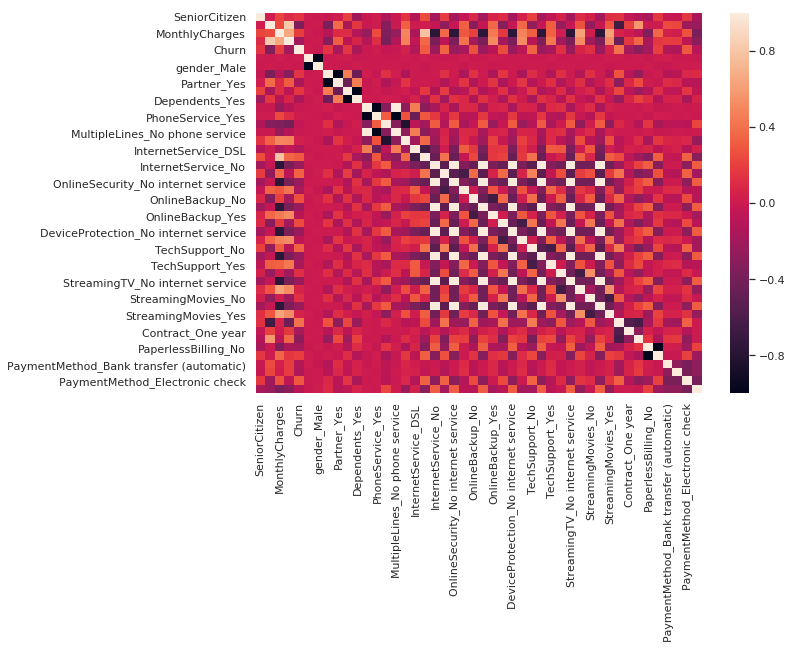

In [8]:
#Plotting the correlation matrix , to find the variables that highly affect the target variable churn
a4_dims = (10, 7)
ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(df_dummies.corr())


# Diagonal Correlation Matrix

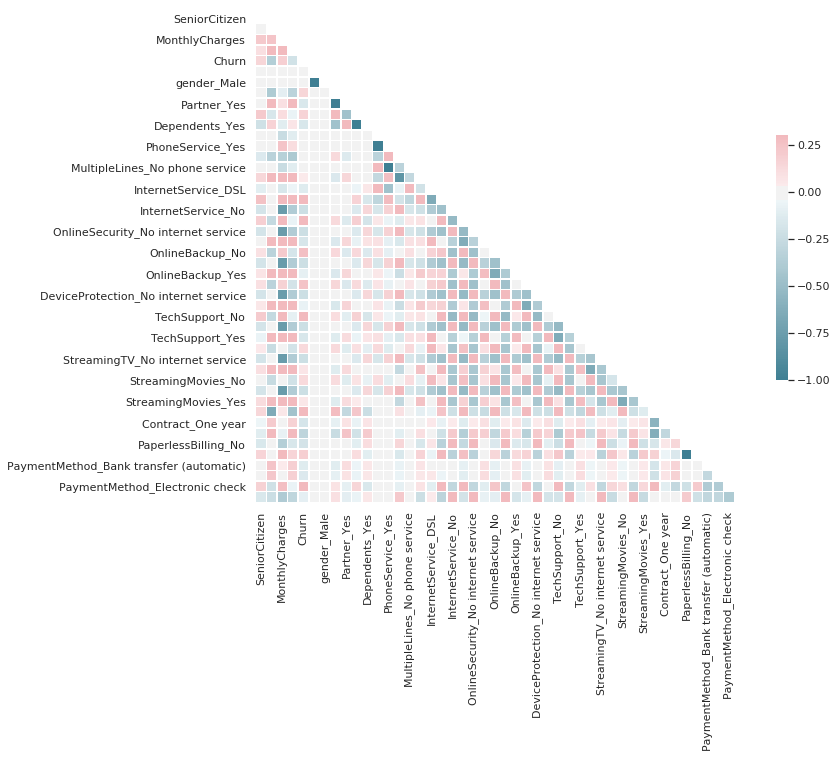

In [9]:

# Compute the correlation matrix
corr = df_dummies.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

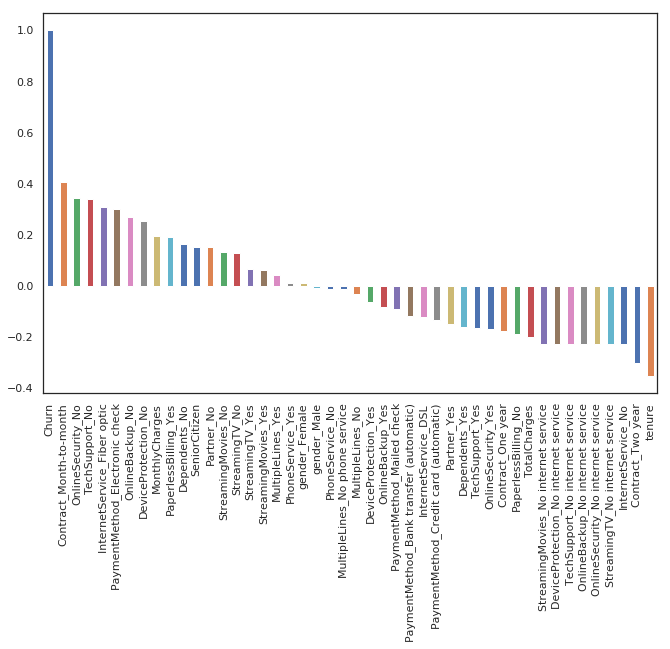

In [10]:
#Get Correlation of "Churn" field with other variables:
plt.figure(figsize=(11,7))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# Finding the Gender Distribution

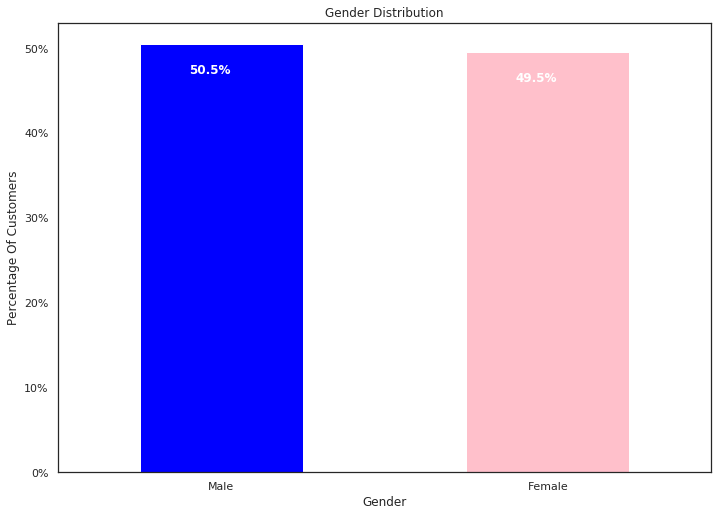

In [11]:
#Finding the Gender distribution in the data
a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)
colors = ['blue','pink']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Percentage of Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage Of Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

# Finding percentage of senior citizens

Text(0.5, 1.0, 'Percentage of Senior Citizens')

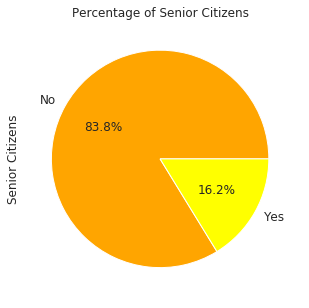

In [12]:

#Finding percentage of senior citizens
colors =['orange','yellow']
a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12,colors = colors )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('Percentage of Senior Citizens', fontsize = 12)

# Distribution of percentage of customers with dependents vs partners

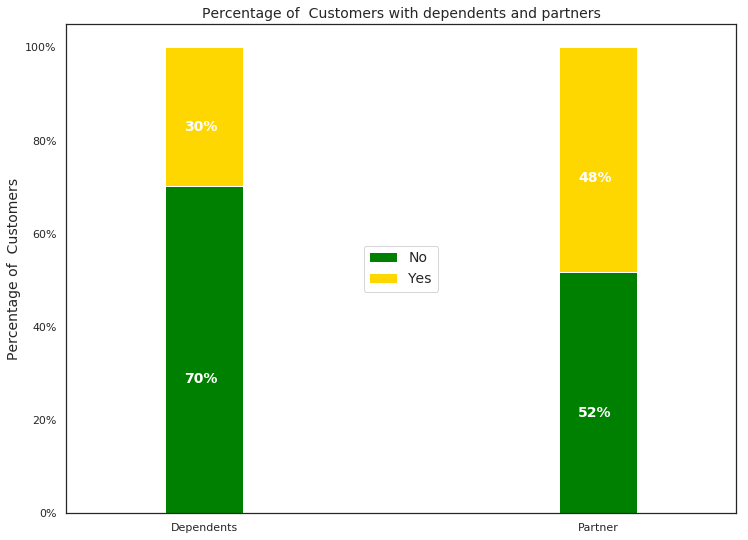

In [13]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['green','gold']

ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(12,9),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Percentage of  Customers',size = 14)
ax.set_xlabel('')
ax.set_title('Percentage of  Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

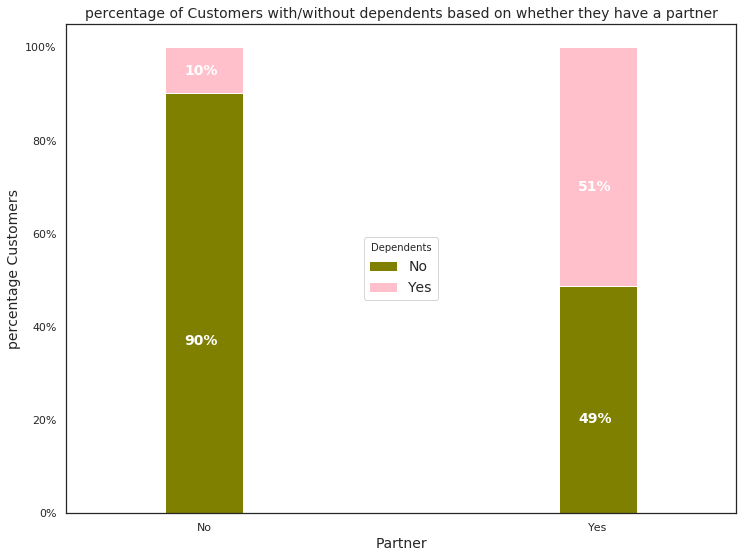

In [14]:
#Plot for percentage of Customers with/without dependents based on whether they have a partner

colors = ['olive','pink']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,9),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('percentage Customers',size = 14)
ax.set_title('percentage of Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

# Number of customers by their tenure

Text(0.5, 1.0, 'Number of Customers by their tenure')

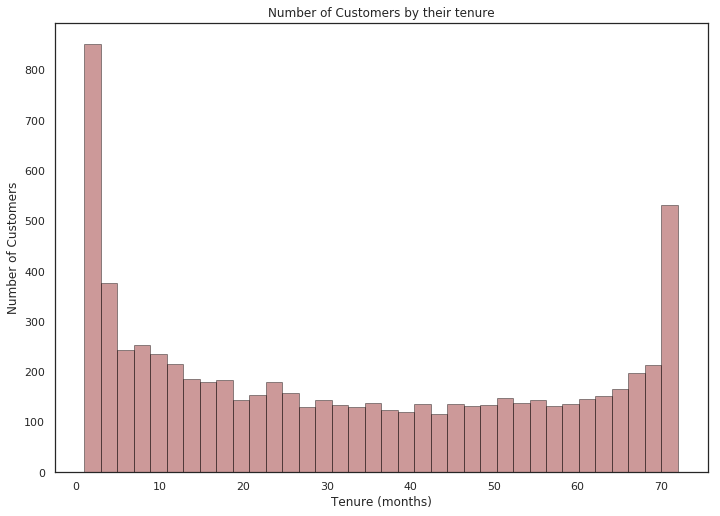

In [15]:

a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'maroon', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by their tenure')

# Number of customers by contract type

Text(0.5, 1.0, 'Number of Customers by Contract Type')

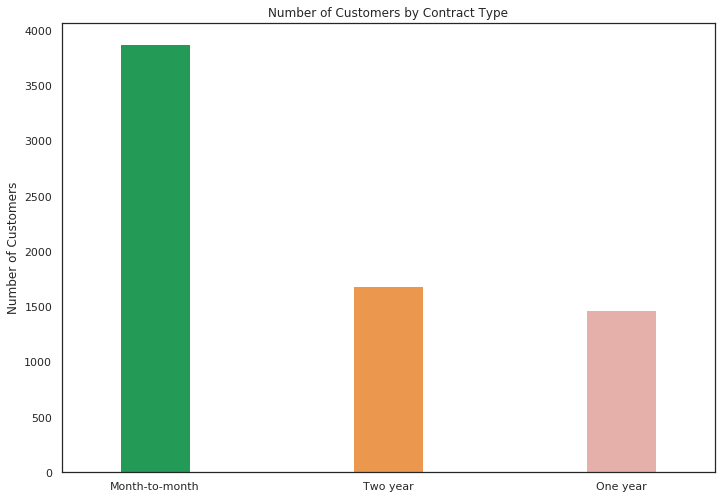

In [16]:
a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)
colors = ['#239B56','#EB984E','#E6B0AA']
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, colors = colors)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

# Distribution of customers for month and years

Text(0.5, 1.0, 'Two Year Contract')

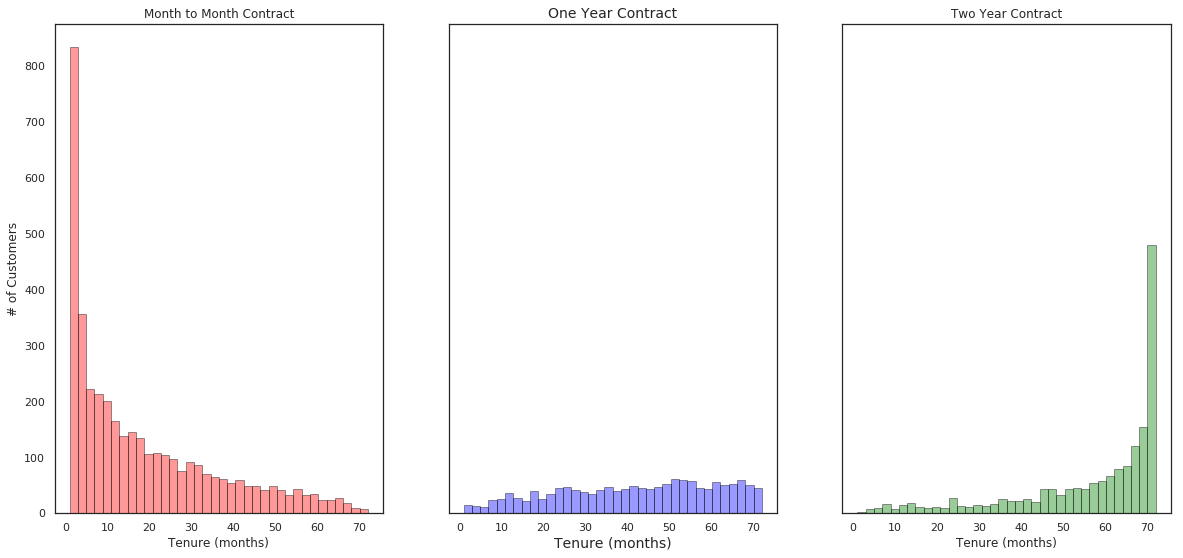

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,9))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'red',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'blue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'green',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

# Distribution of various services and customers availing it

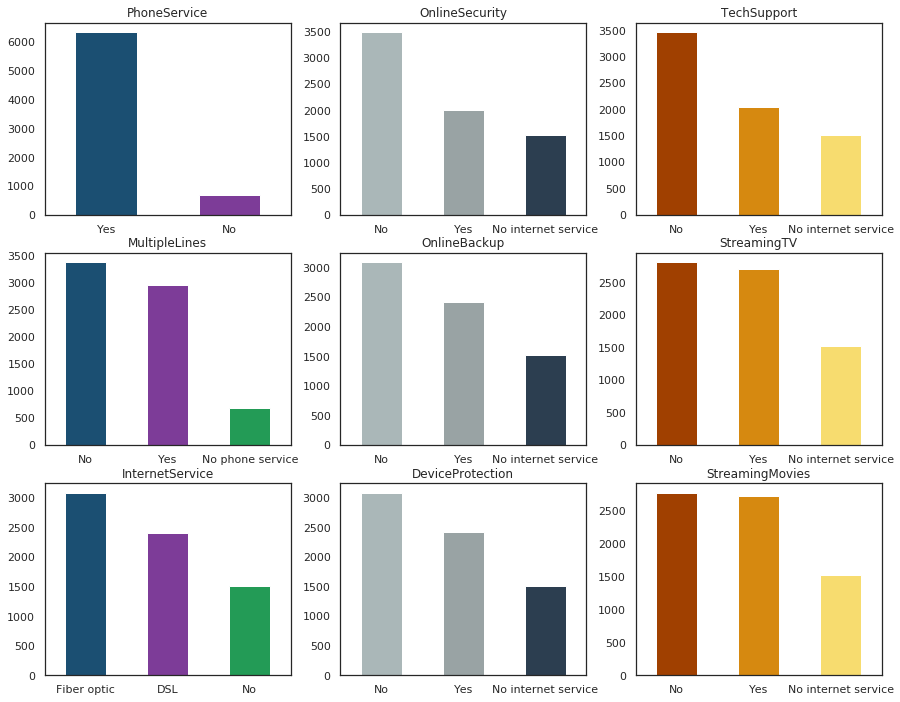

In [18]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
colors1 =['#1B4F72','#7D3C98','#239B56']
colors2 =['#AAB7B8','#99A3A4','#2C3E50']
colors3= ['#A04000','#D68910','#F7DC6F']
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, colors=colors1)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,colors = colors2)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,colors=colors3)
    ax.set_title(item)


# The Churn Rate Distribution


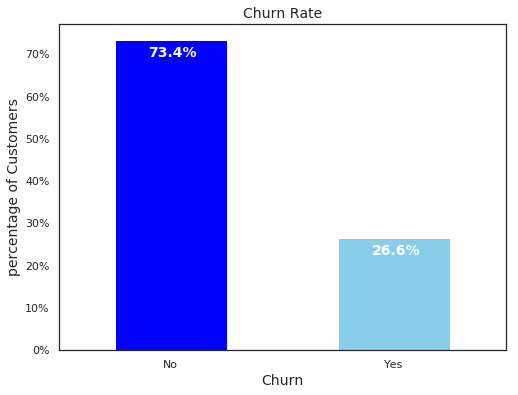

In [19]:
colors = ['blue','skyblue']
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('percentage of Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

# Churn by Contract type

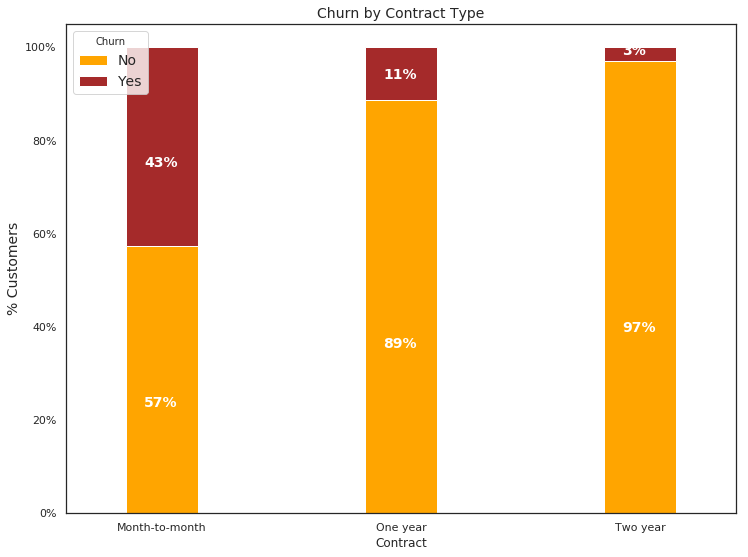

In [20]:
#colors = ['#ff8000','#cc8033']
colors = ['orange','brown']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,9),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


# Churn by Seniority Level

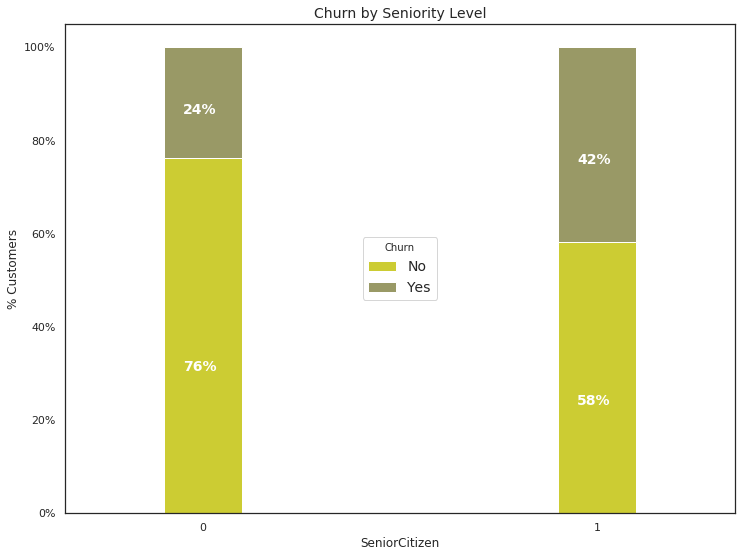

In [21]:
colors = ['#cccc33','#999966']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,9),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

# Distribution of monthly charges by churn

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

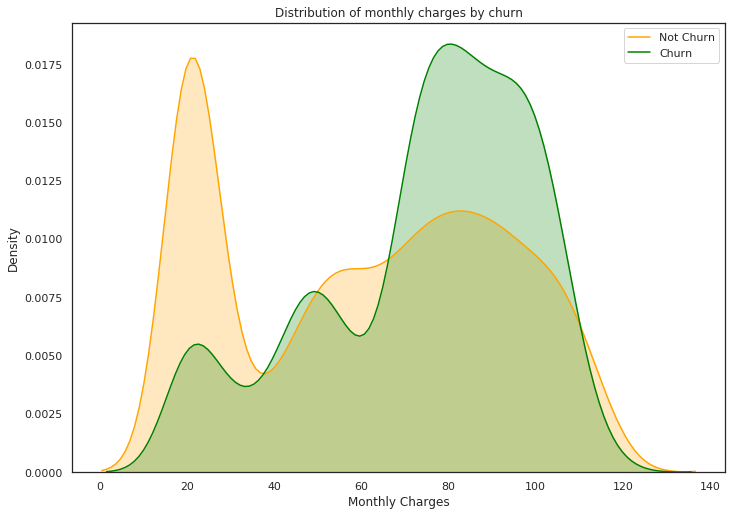

In [22]:
a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)

ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="orange", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="green", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

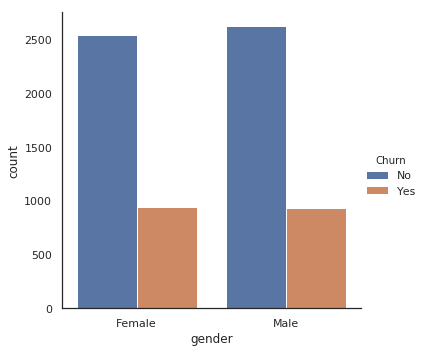

In [23]:
#Gender Distribution vs Churn
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=telecom_cust,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

# Converting the tenure based on months into bins for visualization purpose

In [24]:
#Tenure to categorical column
def tenure_lab(telecom_cust) :
    
    if telecom_cust["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telecom_cust["tenure"] > 12) & (telecom_cust["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telecom_cust["tenure"] > 24) & (telecom_cust["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telecom_cust["tenure"] > 48) & (telecom_cust["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telecom_cust["tenure"] > 60 :
        return "Tenure_gt_60"
telecom_cust["tenure_group"] = telecom_cust.apply(lambda telecom_cust:tenure_lab(telecom_cust),
                                      axis = 1)
#Separating churn and non churn customers
churn     = telecom_cust[telecom_cust["Churn"] == "Yes"]
not_churn = telecom_cust[telecom_cust["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telecom_cust.nunique()[telecom_cust.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telecom_cust.columns if x not in cat_cols + target_col + Id_col]



In [25]:
#cusomer attrition in tenure groups
tg_ch  =  churn["tenure_group"].value_counts().reset_index()
tg_ch.columns  = ["tenure_group","count"]
tg_nch =  not_churn["tenure_group"].value_counts().reset_index()
tg_nch.columns = ["tenure_group","count"]

#bar - churn
trace1 = go.Bar(x = tg_ch["tenure_group"]  , y = tg_ch["count"],
                name = "Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

#bar - not churn
trace2 = go.Bar(x = tg_nch["tenure_group"] , y = tg_nch["count"],
                name = "Non Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Customer attrition in tenure groups",
                        plot_bgcolor  = "white",
                        paper_bgcolor = "white",
                        xaxis = dict(gridcolor = 'white',
                                     title = "Tenure group",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'white',
                                     title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
data = [trace1,trace2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)



# Plotting Scatter plots for customer Tenure - Monthly charges and total charges

In [26]:
telecom_cust[['MonthlyCharges', 'TotalCharges','tenure',"tenure_group"]]

#scatter plot monthly charges & total charges by tenure group

def plot_tenure_scatter(tenure_group,color) :
    tracer = go.Scatter(x = telecom_cust[telecom_cust["tenure_group"] == tenure_group]["MonthlyCharges"],
                        y = telecom_cust[telecom_cust["tenure_group"] == tenure_group]["TotalCharges"],
                        mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = color,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = tenure_group,
                        opacity = .9
                       )
    return tracer

#scatter plot monthly charges & total charges by churn group
def plot_churncharges_scatter(churn,color) :
    tracer = go.Scatter(x = telecom_cust[telecom_cust["Churn"] == churn]["MonthlyCharges"],
                        y = telecom_cust[telecom_cust["Churn"] == churn]["TotalCharges"],
                        mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = color,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = "Churn - " + churn,
                        opacity = .9
                       )
    return tracer

trace1 = plot_tenure_scatter("Tenure_0-12","#feaebf")
trace2 = plot_tenure_scatter("Tenure_12-24","#beefed")
trace3 = plot_tenure_scatter("Tenure_24-48","#aebeef")
trace4 = plot_tenure_scatter("Tenure_48-60","#fedfb3")
trace5 = plot_tenure_scatter("Tenure_gt_60","#aaaaaa")
trace6 = plot_churncharges_scatter("Yes","#a17373")
trace7 = plot_churncharges_scatter("No","#d9ffce")

data1   = [trace1,trace2,trace3,trace4,trace5] 
data2   = [trace7,trace6]

#layout
def layout_title(title) :
    layout = go.Layout(dict(title = title,
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Monthly charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Total Charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            height = 600
                           )
                      )
    return layout

layout1  = layout_title("Monthly Charges Tenure group")
layout2  = layout_title("Total Charges by Churn group")
fig1 = go.Figure(data = data1,layout = layout1)
fig2 = go.Figure(data = data2,layout = layout2)
py.iplot(fig1)
py.iplot(fig2)

In [27]:
df_dummies.head(4)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0


# Create dataframe of majority and minority

In [28]:
# Separate majority and minority classes
df_majority = df_dummies[df_dummies['Churn']==0]
df_minority = df_dummies[df_dummies['Churn']==1]

# Distribution of the churn values

In [29]:
df_dummies['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

# Upscaling the minority points for even distribution to run a predictive model

In [30]:
from sklearn.utils import resample

# Upsample minority class
df_minority_oversampling = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5077,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_oversample = pd.concat([df_majority, df_minority_oversampling])
# Display new class counts
print("Now the distribution of non default and default are almost close")
df_oversample['Churn'].value_counts()

Now the distribution of non default and default are almost close


0    5163
1    5077
Name: Churn, dtype: int64

# Using the MinMax Scaler to normalize the values

In [31]:
# We will use the data frame where we had created dummy variables
y = df_oversample['Churn'].values
X = df_oversample.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# Splitting data into Test and Train 

In [32]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# Running the Logistic Regression Model

accuaracy of model
75.35807291666666


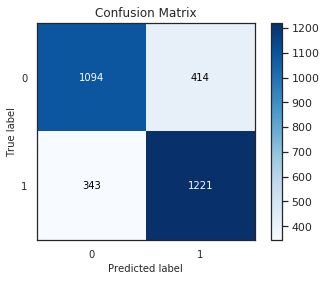

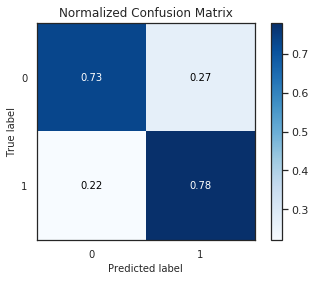

Average precision-recall score: 0.69


In [33]:
# Create dictionary for storing values of all models

prediction = dict()

#Run the logistic Regression model
#import the linear_model class from sklearn package
from sklearn import linear_model

#create an object of the class, logreg is the object of class LogisticRegression
logreg = linear_model.LogisticRegression(C=1e5)

#call object.fir on (X_train----Set of predictors, Y_train ------target variable. 80 percent is used for training)
logreg.fit(X_train, y_train)
#Model learns from training process
#After training the model -- predict the the class for rest of 20 percent of data
prediction['Logistic'] = logreg.predict(X_test)

#after predicting we check for the accuracy
#Accuracy is defined as comparison between the actual class of target variable from the test data vs predicted
print("accuaracy of model")
a= accuracy_score(y_test, prediction['Logistic'])
a=a*100
print(a)


#Print the confusion matrix
#Confusion matrix is classifying Actual and predicted
#False negative ---Predicted as negative but actually positive
#True Positive ----Predicted as positive and actually positive
#True Negative ---- Predicted as negative  and actually negative
#False Positive----Predicted as positive but actually negative
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction['Logistic'])

#print(confusion_matrix)  


import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, prediction['Logistic'])
plt.show()

skplt.metrics.plot_confusion_matrix(y_test, prediction['Logistic'],normalize=True)
plt.show()

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test,prediction['Logistic'])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

# Most important features

AxesSubplot(0.125,0.125;0.775x0.755)


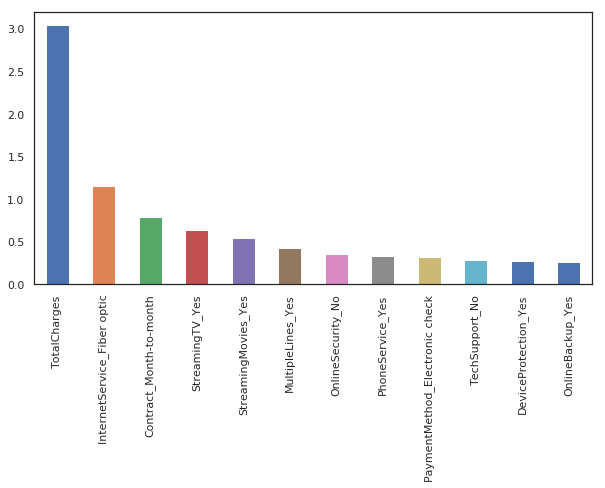

In [34]:
# To get the weights of all the variables
weights = pd.Series(logreg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:12].plot(kind='bar',figsize=(10,5)))

AxesSubplot(0.125,0.125;0.775x0.755)


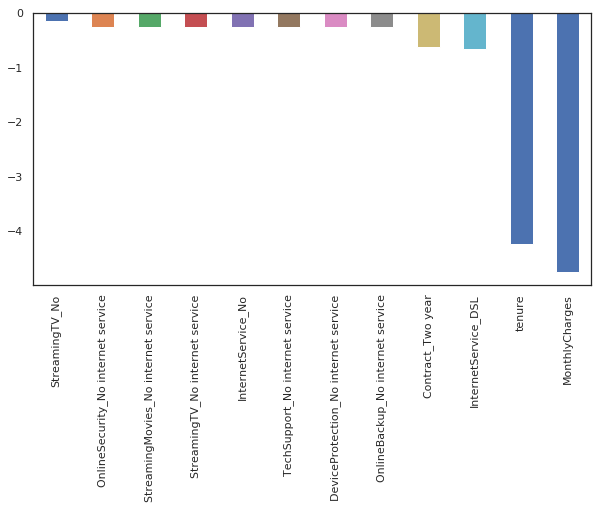

In [35]:
# To get the weights of all the variables
print(weights.sort_values(ascending = False)[-12:].plot(kind='bar',figsize=(10,5)))

# Running the K Nearest Neighbors Classifier

accuaracy of model
74.67447916666666


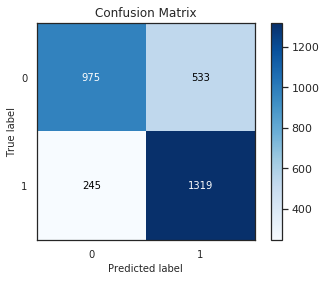

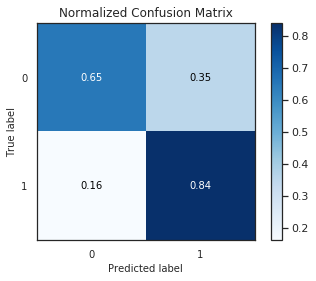

Average precision-recall score: 0.68


In [36]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 
prediction['KNN']= classifier.predict(X_test)  
print("accuaracy of model")
a= accuracy_score(y_test, prediction['KNN'])
a=a*100
print(a)


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction['KNN'])

#print(confusion_matrix)  
import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, prediction['KNN'])
plt.show()

skplt.metrics.plot_confusion_matrix(y_test, prediction['KNN'],normalize=True)
plt.show()


average_precision = average_precision_score(y_test,prediction['KNN'])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))






# Running the Decision Tree Classifier

accuracy of the model
73.11197916666666


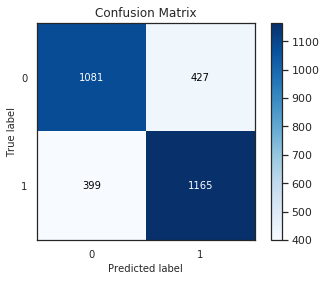

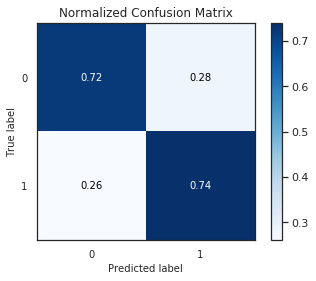

Average precision-recall score: 0.67


In [37]:
#Calling the Decision TRee Classifier class
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)


clf_gini.fit(X_train, y_train)

clf_gini.fit(X_train,y_train)
prediction['DecisionTree'] = clf_gini.predict(X_test)
print("accuracy of the model")
a=accuracy_score(y_test, prediction['DecisionTree'])
a=a*100
print(a)



from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction['DecisionTree'])

#print(confusion_matrix)  


import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, prediction['DecisionTree'])
plt.show()


skplt.metrics.plot_confusion_matrix(y_test, prediction['DecisionTree'],normalize=True)
plt.show()



average_precision = average_precision_score(y_test,prediction['DecisionTree'])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))



# Picture of the Tree with three levels

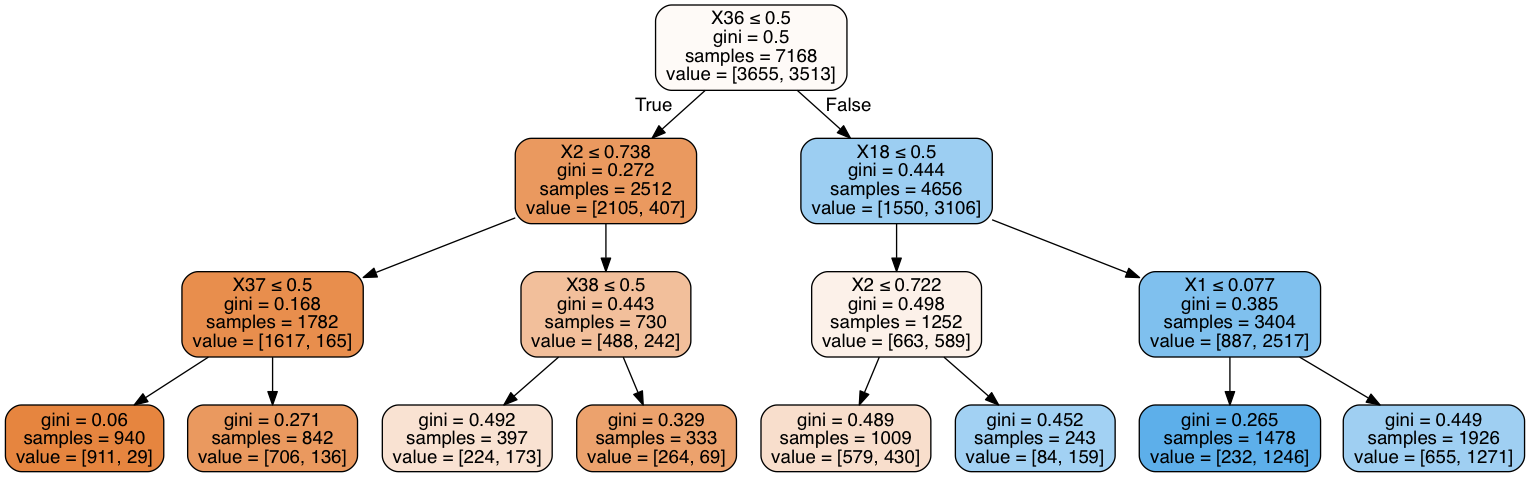

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



# The Random Tree classifier

87.56510416666666


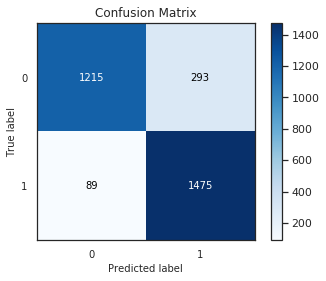

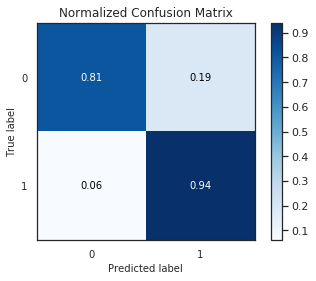

Average precision-recall score: 0.82


In [39]:
#calling the RandomForest Classifier


clf = RandomForestClassifier(n_jobs=1000, 
                             random_state=9,
                             #criterion=RFC_METRIC,
                             n_estimators=11,
                             verbose=False)
clf.fit(X_train,y_train)
prediction['RandomForest'] = clf.predict(X_test)
a= accuracy_score(prediction['RandomForest'], y_test)
a= a*100
print(a)


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction['RandomForest'])

#print(confusion_matrix)  


import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, prediction['RandomForest'])
plt.show()


skplt.metrics.plot_confusion_matrix(y_test, prediction['RandomForest'],normalize=True)
plt.show()


average_precision = average_precision_score(y_test,prediction['RandomForest'])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

# Features in order of their importance

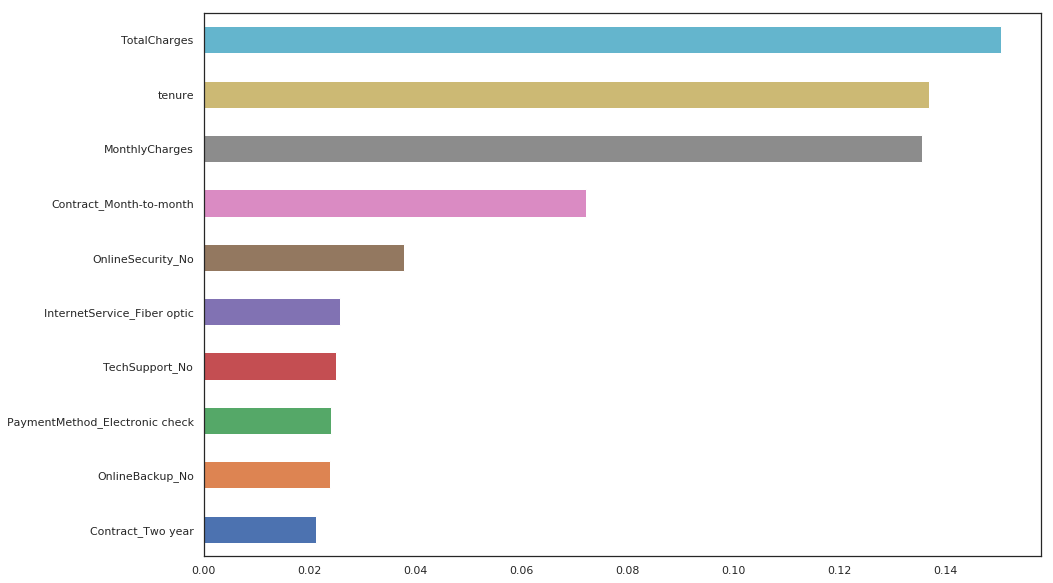

In [40]:
importances = clf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh',figsize=(15,10))

# Picture of the tree with three levels

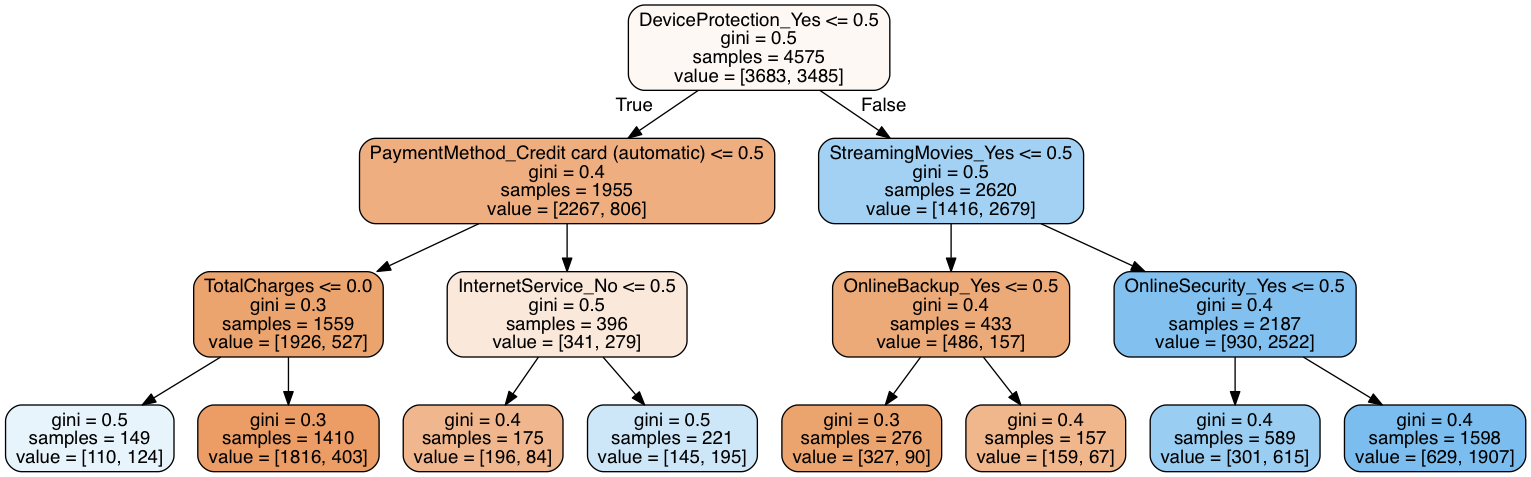

In [41]:
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
dfnew = df_oversample.iloc[:, :-1]
feature_list =list(dfnew.columns)
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, filled =True,precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');
Image(graph.create_png())

# Accuracy of all the models

In [42]:
from sklearn.metrics import accuracy_score

cmp = 0
for model, predicted in prediction.items():
    accuracy = accuracy_score(y_test, predicted)
    accuracy
    print(model, accuracy*100)
    cmp += 1
    
    

Logistic 75.35807291666666
KNN 74.67447916666666
DecisionTree 73.11197916666666
RandomForest 87.56510416666666


# Area Under the curve - Receiver Operator Characteristic

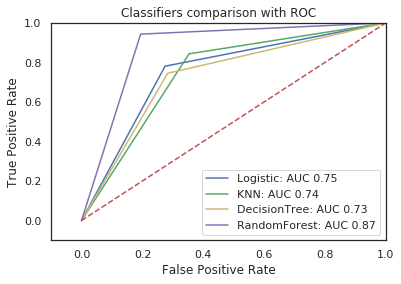

In [43]:
#Plotting the ROC - Area Under the Curve for all the models

def formatt(x):
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Learning Process
#Exploratory Data Analysis
#Visualization of various features, using plotly
#Data Manipulation
#Scaling the Data
#Feature importance
#Running various models, comparing their accuracy
#Interpreting the results of confusion matrix and Area under the curve



# Conclusion
#Random forest classifier is the best model, for customer attrition prediction, with a accuracy of 88 percent, with precision recall score of .82 and area under the curve of 0.87.
#The best set of predictors are Total charges, tenure, monthly charges, contract month to month. Cost is the deciding factor if customers with churn the service.
#Monthly charges are lowest for the first one year, keeps increasing based on tenure.
#Maximum customer attrition happens in the first 12 months.
#Senior citizens are more likely to churn the service.


